In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/Users/ryan/Downloads/mlb_umpires.csv')

In [9]:
df.head(10)

,Umpire,Games,k_pct,bb_pct,RPG,BA,OBP,SLG,boost_stat,boost_pct,Rating
0,James Hoye,496,20.4,8.7,8.99,0.253,0.324,0.410,K,16.0,Defensive
1,James Hoye,496,20.4,8.7,8.99,0.253,0.324,0.410,BB,-1.0,Defensive
2,James Hoye,496,20.4,8.7,8.99,0.253,0.324,0.410,R,-3.0,Defensive
3,James Hoye,496,20.4,8.7,8.99,0.253,0.324,0.410,BA,-4.0,Defensive
4,James Hoye,496,20.4,8.7,8.99,0.253,0.324,0.410,OBP,-3.0,Defensive
5,James Hoye,496,20.4,8.7,8.99,0.253,0.324,0.410,SLG,-1.0,Defensive
6,Lance Barksdale,494,20.4,8.8,8.68,0.253,0.324,0.408,K,-10.0,Offensive
7,Lance Barksdale,494,20.4,8.8,8.68,0.253,0.324,0.408,BB,8.0,Offensive
8,Lance Barksdale,494,20.4,8.8,8.68,0.253,0.324,0.408,R,2.0,Offensive
9,Lance Barksdale,494,20.4,8.8,8.68,0.253,0.324,0.408,BA,4.0,Offensive


In [144]:
df[df['Games'] >= df['Games'].mean()].sort_values(by='k_pct',ascending=False).drop_duplicates(subset='Umpire').head(10)[['Umpire','k_pct','Games']]

,Umpire,k_pct,Games
461,Ryan Blakney,23.2,266
403,Tripp Gibson,22.8,314
417,Gabe Morales,22.6,306
426,Will Little,22.4,292
389,Adam Hamari,22.3,329
213,Vic Carapazza,22.2,412
396,Mark Ripperger,22.0,316
339,Lance Barrett,21.9,353
29,Bill Miller,21.9,530
84,Phil Cuzzi,21.8,478


In [146]:
df[df['Games'] >= df['Games'].mean()].sort_values(by='RPG',ascending=True).drop_duplicates(subset='Umpire').head(10)[['Umpire','RPG','Games']]

,Umpire,RPG,Games
286,Cory Blaser,8.20,379
36,Doug Eddings,8.35,501
26,Bill Miller,8.39,530
215,Vic Carapazza,8.43,412
366,Kerwin Danley,8.43,332
168,Ron Kulpa,8.44,443
88,Phil Cuzzi,8.51,478
278,Gary Cederstrom,8.56,381
77,CB Bucknor,8.56,479
295,Paul Nauert,8.56,373


<Axes: xlabel='BA', ylabel='Count'>

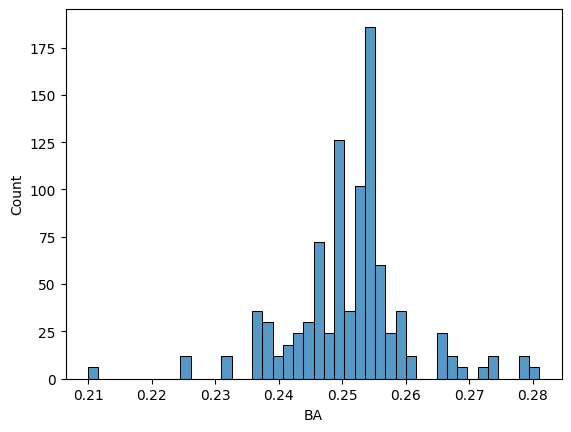

In [149]:
sns.histplot(x='BA',data=df)

<Axes: xlabel='boost_pct'>

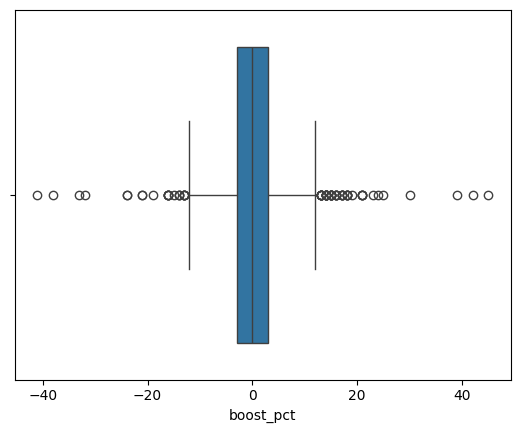

In [147]:
sns.boxplot(x='boost_pct',data=df)

In [11]:
df['Umpire'].nunique()

156

In [12]:
df['boost_stat'].unique()

array(['K', 'BB', 'R', 'BA', 'OBP', 'SLG'], dtype=object)

<Axes: xlabel='k_pct', ylabel='Count'>

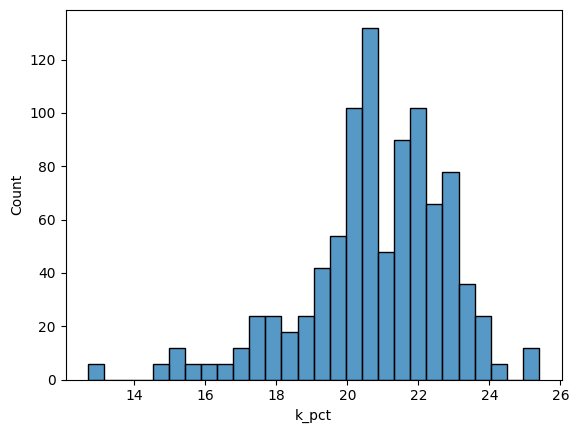

In [13]:
sns.histplot(x='k_pct',data=df)

<Axes: xlabel='Games'>

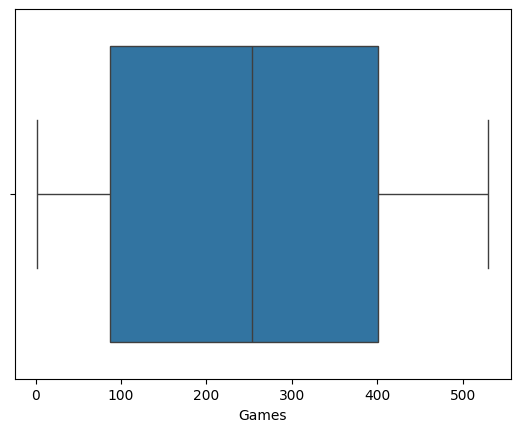

In [106]:
sns.boxplot(x='Games',data=df)

<Axes: xlabel='Games', ylabel='k_pct'>

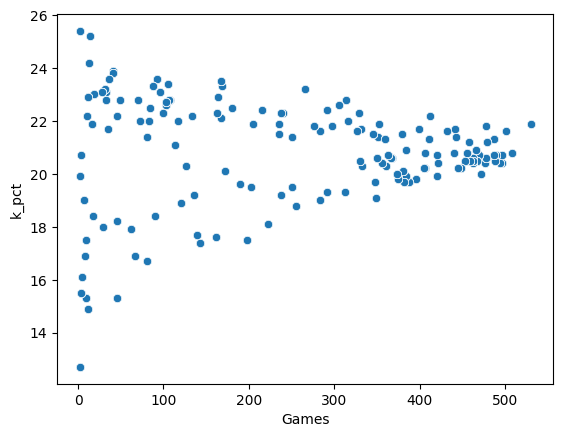

In [107]:
sns.scatterplot(x='Games',y='k_pct',data=df)

<Axes: xlabel='Games', ylabel='BA'>

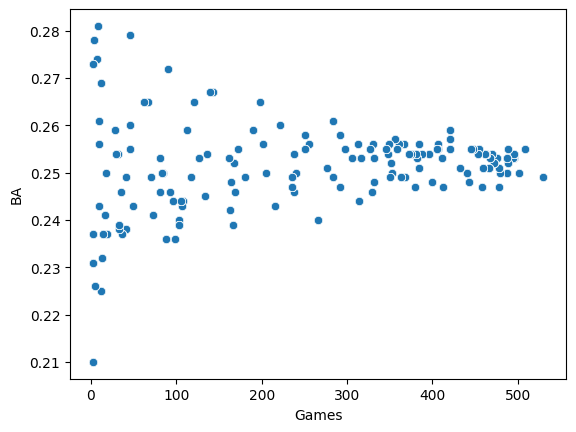

In [108]:
sns.scatterplot(x='Games',y='BA',data=df)

In [14]:
df['k_pct'].mean()

20.796153846153846

In [15]:
df['k_pct'].std()

2.032060189497152

<Axes: xlabel='k_pct'>

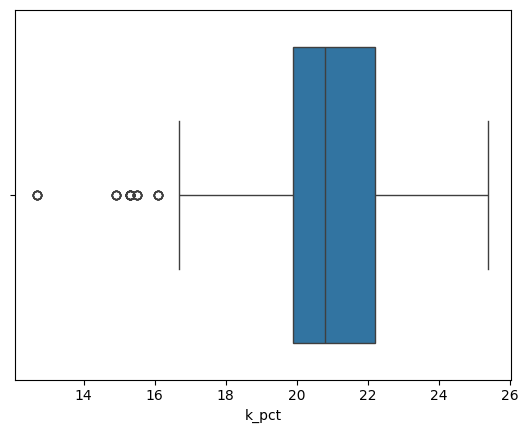

In [16]:
sns.boxplot(x='k_pct',data=df)

In [21]:
high = df['k_pct'].quantile(.75)
low = df['k_pct'].quantile(.25)
iqr = high-low

In [34]:
highoutliers = df[df['k_pct'] > (high + 1.5*iqr)]['k_pct']
lowoutliers = df[df['k_pct'] < (low - 1.5*iqr)]['k_pct']

In [36]:
highoutliers.unique()

array([], dtype=float64)

In [35]:
lowoutliers.unique()

array([15.3, 14.9, 16.1, 15.5, 12.7])

In [38]:
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [71]:
X = df.drop(columns=['RPG','Umpire','boost_stat','Rating','boost_pct','SLG','OBP'])
y = df['RPG']

In [72]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [73]:
lg = LinearRegression(fit_intercept=True)

In [74]:
lg.fit(x_train,y_train)

LinearRegression()

In [75]:
lg.intercept_

-11.89417404740157

In [117]:
predslg = lg.predict(x_test)

In [118]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(predslg,y_test))

0.17908151538342607


In [119]:
predsdf = pd.DataFrame({'Prediction': predslg, 'Real': y_test})

In [120]:
predsdf

,Prediction,Real
730,8.361484,8.90
806,8.392834,8.82
407,8.587158,8.62
2,8.808613,8.99
577,8.939793,8.82
...,...,...
395,9.184753,9.19
340,8.859356,8.74
532,8.976880,8.56
477,9.397546,9.47


In [121]:
testdf = pd.DataFrame(data={'Games':[255],'k_pct':[15],'bb_pct':[10],'BA':[0.270]})

In [122]:
testdf

,Games,k_pct,bb_pct,BA
0,255,15,10,0.27


In [123]:
pred = lg.predict(testdf)

In [124]:
pred

array([9.31687386])

In [125]:
residuals = y_test-predslg

In [126]:
predsdf = pd.DataFrame({'Prediction': predslg, 'Real': y_test,'Residual':residuals})

In [127]:
predsdf

,Prediction,Real,Residual
730,8.361484,8.90,0.538516
806,8.392834,8.82,0.427166
407,8.587158,8.62,0.032842
2,8.808613,8.99,0.181387
577,8.939793,8.82,-0.119793
...,...,...,...
395,9.184753,9.19,0.005247
340,8.859356,8.74,-0.119356
532,8.976880,8.56,-0.416880
477,9.397546,9.47,0.072454


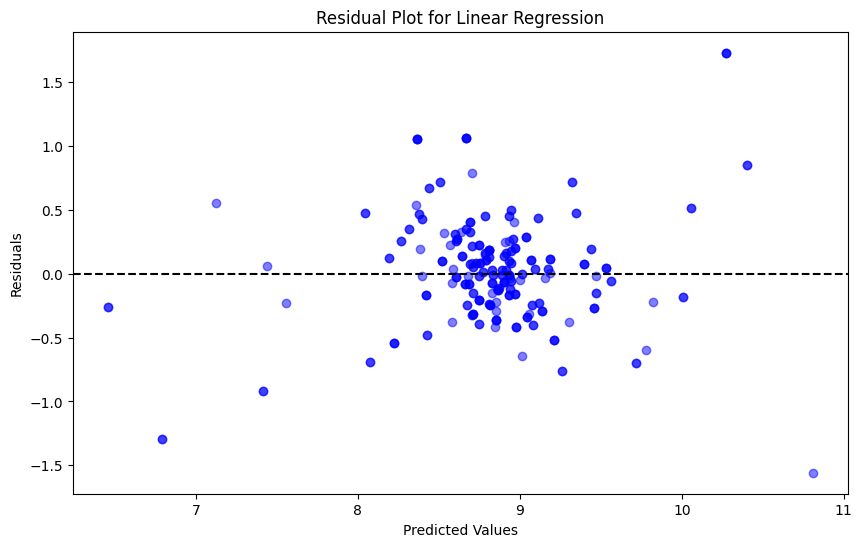

In [129]:
plt.figure(figsize=(10, 6))
plt.scatter(predslg, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Residual Plot for Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [112]:
preds = rf.predict(x_test)

In [113]:
print(mean_squared_error(preds,y_test))

0.000470115160142331


In [132]:
residuals2 = y_test-preds

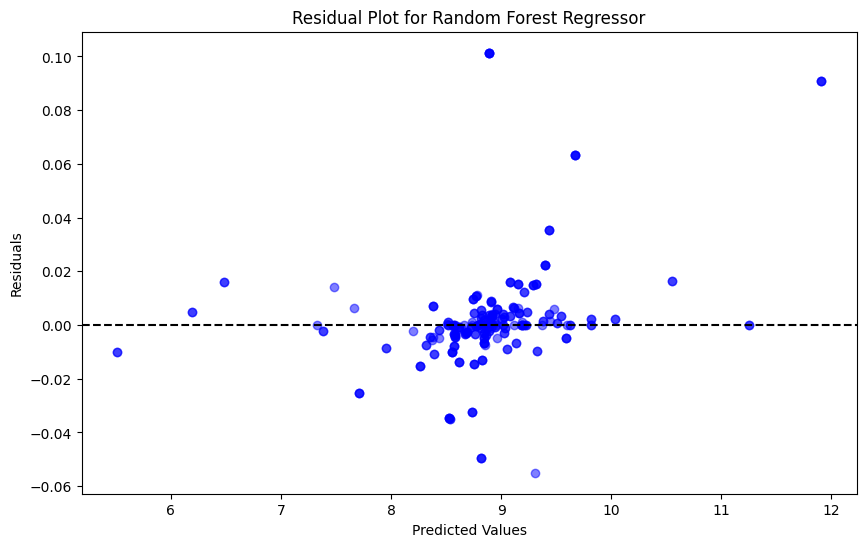

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(preds, residuals2, color='blue', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Residual Plot for Random Forest Regressor')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [133]:
predsdf2 = pd.DataFrame({'Prediction': preds, 'Real': y_test,'Residual':residuals2})

In [134]:
predsdf2

,Prediction,Real,Residual
730,8.8994,8.90,6.000000e-04
806,8.8143,8.82,5.700000e-03
407,8.6214,8.62,-1.400000e-03
2,8.8886,8.99,1.014000e-01
577,8.8174,8.82,2.600000e-03
...,...,...,...
395,9.1890,9.19,1.000000e-03
340,8.7400,8.74,-7.105427e-15
532,8.5677,8.56,-7.700000e-03
477,9.4346,9.47,3.540000e-02


In [135]:
pred2 = rf.predict(testdf)
pred2

array([9.4953])

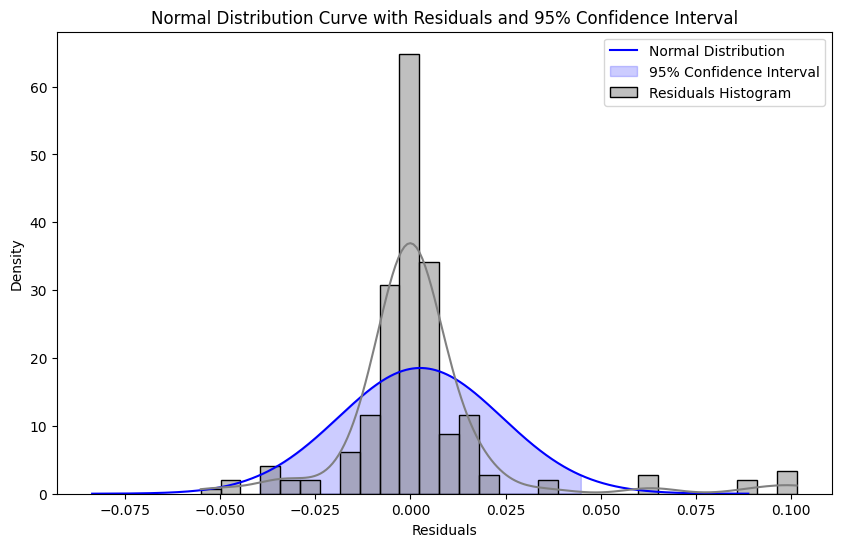

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


mu = np.mean(residuals2)
sigma = np.std(residuals2)

# Create a range of values for plotting the normal curve
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

plt.figure(figsize=(10, 6))
plt.plot(x, norm.pdf(x, mu, sigma), label='Normal Distribution', color='blue')

plt.fill_between(x, norm.pdf(x, mu, sigma), where=(x >= mu - 1.96*sigma) & (x <= mu + 1.96*sigma), 
                 color='blue', alpha=0.2, label='95% Confidence Interval')

sns.histplot(residuals2, kde=True, stat='density', bins=30, color='gray', label='Residuals Histogram')

plt.title('Normal Distribution Curve with Residuals and 95% Confidence Interval')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.show()
